In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


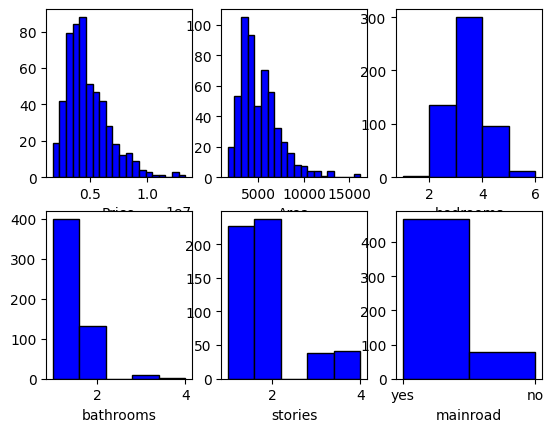

In [3]:
plt.subplot(2,3,1)
plt.hist(data['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Price')

plt.subplot(2,3,2)
plt.hist(data['area'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Area')

plt.subplot(2,3,3)
plt.hist(data['bedrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bedrooms')

plt.subplot(2,3,4)
plt.hist(data['bathrooms'], bins=5, color='blue', edgecolor='black')
plt.xlabel('bathrooms')

plt.subplot(2,3,5)
plt.hist(data['stories'], bins=5, color='blue', edgecolor='black')
plt.xlabel('stories')

plt.subplot(2,3,6)
plt.hist(data['mainroad'], bins=2, color='blue', edgecolor='black')
plt.xlabel('mainroad')

plt.show()

<Axes: xlabel='furnishingstatus'>

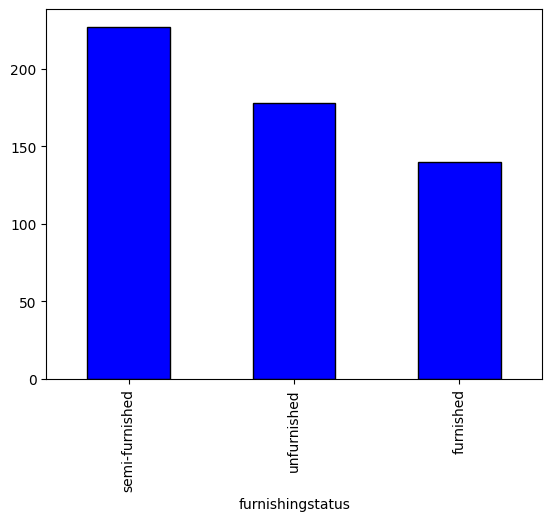

In [4]:
data['furnishingstatus'].value_counts().plot(kind='bar', color='blue', edgecolor='black')  

In [5]:
for col in data.columns:
    print('{col}:'.format(col=col), data[col].isnull().sum())

price: 0
area: 0
bedrooms: 0
bathrooms: 0
stories: 0
mainroad: 0
guestroom: 0
basement: 0
hotwaterheating: 0
airconditioning: 0
parking: 0
prefarea: 0
furnishingstatus: 0


In [6]:
# encoding the categorical variables
#encodign binary columns
label_encoder = LabelEncoder()

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df = data.copy()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
# encoding furnishingstatus via one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)

for col in df.columns:
    if 'furnishingstatus' in col:
        df[col] = df[col].astype('int64')
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [7]:
model = LinearRegression()

params = df.columns.tolist()
params.remove('price')

X = df[params]
y = data['price']

model.fit(X, y)

LinearRegression()

In [8]:
y_pred = model.predict(X)

data['y_pred'] = y_pred
print(data[['area', 'price', 'y_pred']])

     area     price        y_pred
0    7420  13300000  8.133305e+06
1    8960  12250000  1.056103e+07
2    9960  12250000  7.626588e+06
3    7500  12215000  8.329202e+06
4    7420  11410000  6.693878e+06
..    ...       ...           ...
540  3000   1820000  3.357640e+06
541  2400   1767150  2.365240e+06
542  3620   1750000  2.604686e+06
543  2910   1750000  2.536096e+06
544  3850   1750000  3.226473e+06

[545 rows x 3 columns]


In [10]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.6818018485540142
Mean Squared Error: 1111187722284.4001


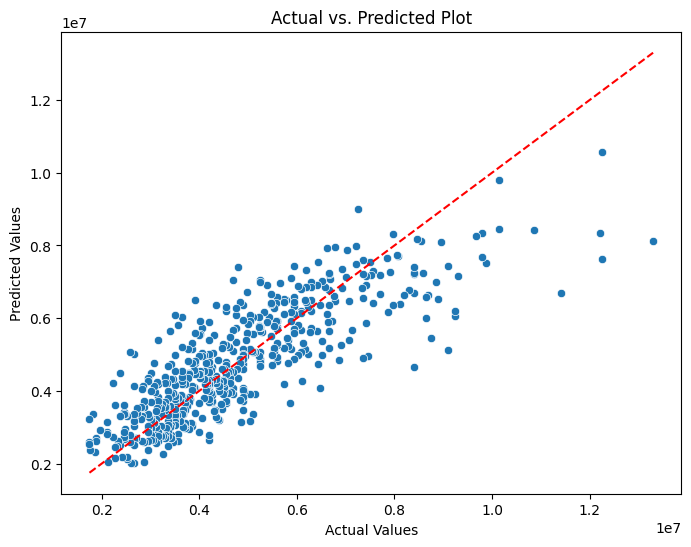

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()

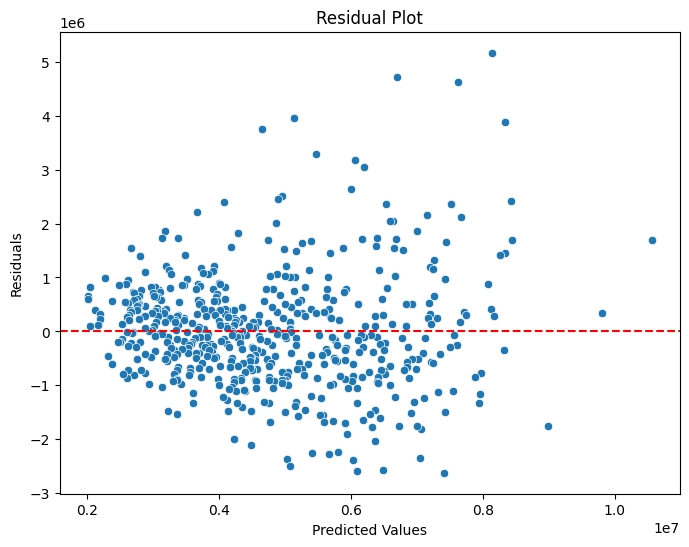

In [12]:
# Residuals (errors)
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

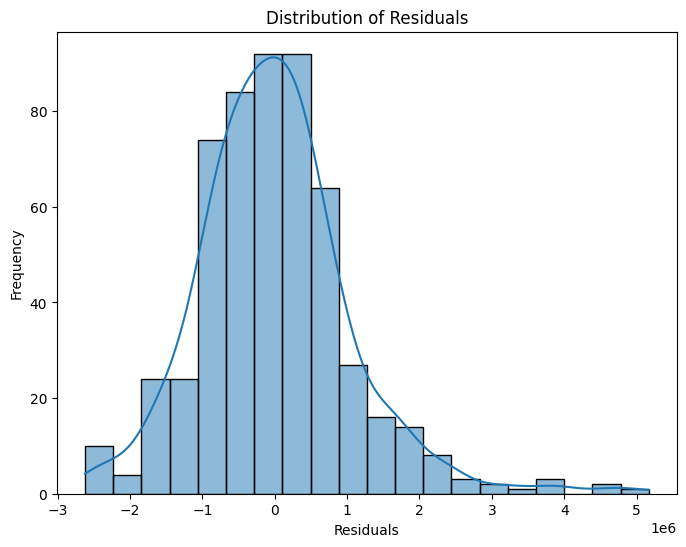

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()